In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [3]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime
from shapely import wkt

In [4]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [5]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [6]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 4079.39it/s]


In [7]:
city_sub_routes

osm_id   route                  to  \
0    18683  subway         Isolatorweg   
1  4515354  subway                Gein   
2    31249  subway         Isolatorweg   
3  4515355  subway    Centraal Station   
4  8466667  subway                Zuid   
5  8466671  subway               Noord   
6    18532  subway         Gaasperplas   
7  4515356  subway  Amsterdam Centraal   
8    18423  subway                Gein   
9  4515357  subway    Centraal Station   

                                        name ref                 network  \
0              Metro 50: Gein => Isolatorweg  50  Stadsvervoer Amsterdam   
1              Metro 50: Isolatorweg => Gein  50  Stadsvervoer Amsterdam   
2  Metro 51: Centraal Station => Isolatorweg  51  Stadsvervoer Amsterdam   
3  Metro 51: Isolatorweg => Centraal Station  51  Stadsvervoer Amsterdam   
4                    Metro 52: Noord => Zuid  52  Stadsvervoer Amsterdam   
5                    Metro 52: Zuid => Noord  52  Stadsvervoer Amsterdam   
6  Metro 53: Centraal Station => Gaasperplas  53  Stadsvervoer Amsterdam   
7  Metro 53: Gaasperplas => Centraal Station  53  Stadsvervoer Amsterdam   
8         Metro 54: Centraal Station => Gein  54  Stadsvervoer Amsterdam   
9         Metro 54: Gein => Centraal Station  54  Stadsvervoer Amsterdam   

  service                                           geometry  
0    None  MULTILINESTRING ((4.98996 52.2964, 4.98959 52....  
1    None  MULTILINESTRING ((4.8388 52.38842, 4.83897 52....  
2    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3    None  MULTILINESTRING ((4.8388 52.38842, 4.83897 52....  
4    None  MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
5    None  MULTILINESTRING ((4.87423 52.33922, 4.87552 52...  
6    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
7    None  MULTILINESTRING ((4.98373 52.31201, 4.98364 52...  
8    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
9    None  MULTILINESTRING ((4.98996 52.2964, 4.98959 52....

In [8]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [9]:
# id_nodes_length_sub

In [10]:
# id_edges_length_sub

In [11]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [12]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [13]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [14]:
# city_sub_nodes

In [15]:
# city_sub_stations

In [16]:
# city_sub_edges

In [17]:
# city_sub_routes

In [18]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [19]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [20]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [21]:
city_sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x      geo_y
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161  52.296407
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974  52.295637
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126  52.298132
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606  52.331769
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539  52.337689
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963  52.339322
 11   8

In [22]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [23]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [24]:
# city_sub_order_route_dict

In [25]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [26]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [27]:
# city_sub_all_shortest_paths_id_dict

In [28]:
# city_sub_edges

In [29]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [30]:
# city_sub_ordered_edges

In [31]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [32]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [33]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [34]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [35]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [36]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [37]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [38]:
# city_sub_shortest_path_edges_df

In [39]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [40]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [41]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [42]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [43]:
# city_sub_shortest_path_nodes_id

In [44]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [45]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [46]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [47]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [48]:
# city_sub_new_stations

## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [49]:
connect_stations_name_metro,connect_stations_dataframe_metro = select_connect_stations_one_network(city_sub_new_stations)

In [50]:
connect_stations_name_metro

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [51]:
# connect_stations_dataframe_metro

### Build connection edges

In [52]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_metro,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [53]:
city_sub_connected_edges.sort_values(by='distance')

osm_id                                           geometry railway  \
373  503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499  181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498  503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
614  166161639  LINESTRING (4.9820769 52.3137638, 4.9820664 52...  subway   
594   39271205  LINESTRING (4.9743774 52.2955964, 4.9744107 52...  subway   
..         ...                                                ...     ...   
60    26982055  LINESTRING (4.8372863 52.3392173, 4.8369983 52...  subway   
607  166161630  LINESTRING (4.9791866 52.3170385, 4.978573 52....  subway   
588   23208282  LINESTRING (4.9728869 52.3236783, 4.9735608 52...  subway   
362  397809117  LINESTRING (4.926275 52.3971789, 4.9260716 52....  subway   
293  397809123  LINESTRING (4.9182755 52.3885941, 4.9184548 52...  subway   

    service   id  from_id  to_id     distance      time     to_from  \
373    yard  753      265    523     0.931719  0.000037  (523, 265)   
499    None  488      415    143     1.299982  0.000052  (143, 415)   
498    None  767      413    700     1.335778  0.000053  (700, 413)   
614    None  341      504    306     1.593889  0.000064  (306, 504)   
594    None  157      144    145     2.355372  0.000094  (145, 144)   
..      ...  ...      ...    ...          ...       ...         ...   
60     None   93      100    101   735.893891  0.029436  (101, 100)   
607    None  337      821    301   852.145611  0.034086  (301, 821)   
588    None   37       56    812   854.186556  0.034167   (812, 56)   
362    None  683      621    818  1108.588537  0.044344  (818, 621)   
293    None  686      817    624  1110.367311  0.044415  (624, 817)   

        from_to  count_weight                            route_name_list  \
373  (265, 523)           1.0  Metro 53: Centraal Station => Gaasperplas   
499  (415, 143)           1.0              Metro 50: Gein => Isolatorweg   
498  (413, 700)           1.0              Metro 50: Isolatorweg => Gein   
614  (504, 306)           1.0  Metro 53: Gaasperplas => Centraal Station   
594  (144, 145)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
60   (100, 101)           1.0              Metro 50: Gein => Isolatorweg   
607  (821, 301)           1.0  Metro 53: Gaasperplas => Centraal Station   
588   (56, 812)           1.0  Metro 53: Centraal Station => Gaasperplas   
362  (621, 818)           1.0                    Metro 52: Noord => Zuid   
293  (817, 624)           1.0                    Metro 52: Zuid => Noord   

      route     ref      weights  wcl_weights  
373  subway      53     0.931719     0.931719  
499  subway  50, 54     1.299982     1.299982  
498  subway  50, 54     1.335778     1.335778  
614  subway      53     1.593889     1.593889  
594  subway  50, 54     2.355372     2.355372  
..      ...     ...          ...          ...  
60   subway  50, 51   735.893891   735.893891  
607  subway      53   852.145611   852.145611  
588  subway      53   854.186556   854.186556  
362  subway      52  1108.588537  1108.588537  
293  subway      52  1110.367311  1110.367311  

[684 rows x 17 columns]

In [54]:
city_sub_connected_edges

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1    23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2    23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3    26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4    26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
..        ...                                                ...     ...   
679       NaN  LINESTRING (4.8772326 52.3393181, 4.8739781 52...     NaN   
680       NaN  LINESTRING (4.8772326 52.3393181, 4.8780248 52...     NaN   
681       NaN  LINESTRING (4.8780248 52.3393025, 4.8739633 52...     NaN   
682       NaN  LINESTRING (4.8780248 52.3393025, 4.8739781 52...     NaN   
683       NaN  LINESTRING (4.8780248 52.3393025, 4.8772326 52...     NaN   

    service    id  from_id  to_id    distance       time     to_from  \
0      None   163      147     25   31.352181   0.001254   (25, 147)   
1      None    16       25     23   59.170137   0.002367    (23, 25)   
2      None    15       23     24   93.935464   0.003757    (24, 23)   
3      None   106       24    109   41.168856   0.001647   (109, 24)   
4      None   114      109    588   11.809676   0.000472  (588, 109)   
..      ...   ...      ...    ...         ...        ...         ...   
679     NaN  1005      180     83  365.940055  16.500000   (83, 180)   
680     NaN  1006      180    345   88.233092  16.500000  (345, 180)   
681     NaN  1007      345    840  452.138504  16.500000  (840, 345)   
682     NaN  1008      345     83  453.103438  16.500000   (83, 345)   
683     NaN  1009      345    180   88.233092  16.500000  (180, 345)   

        from_to  count_weight                route_name_list   route     ref  \
0     (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1      (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2      (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3     (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4    (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
..          ...           ...                            ...     ...     ...   
679   (180, 83)           NaN                            NaN     NaN     NaN   
680  (180, 345)           NaN                            NaN     NaN     NaN   
681  (345, 840)           NaN                            NaN     NaN     NaN   
682   (345, 83)           NaN                            NaN     NaN     NaN   
683  (345, 180)           NaN                            NaN     NaN     NaN   

         weights  wcl_weights  
0      31.352181    31.352181  
1      59.170137    59.170137  
2      93.935464    93.935464  
3      41.168856    41.168856  
4      11.809676    11.809676  
..           ...          ...  
679  6875.000000  6875.000000  
680  6875.000000  6875.000000  
681  6875.000000  6875.000000  
682  6875.000000  6875.000000  
683  6875.000000  6875.000000  

[684 rows x 17 columns]

In [55]:
duplicate_rows = city_sub_connected_edges[city_sub_connected_edges.duplicated(['id'], keep=False)]

In [56]:
duplicate_rows

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id, from_id, to_id, distance, time, to_from, from_to, count_weight, route_name_list, route, ref, weights, wcl_weights]
Index: []

# Tram-Amsterdam

## Generate Baseline Networks

In [57]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 4321.25it/s]


Calculate_degree possibly unhappy


In [58]:
# city_tram_stations

In [59]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [60]:
id_nodes_length_tram

1920

In [61]:
id_edges_length_tram 

2204

In [62]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [63]:
# city_tram_edges

In [64]:
# city_tram_nodes

In [65]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [66]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time']]).to_file('city_tram_edges0612.GPKG',driver='GPKG')

In [67]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [68]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 3168].index, inplace=True)  # 20240909

city_tram_edges = city_tram_edges.reset_index(drop = True)

In [69]:
# city_tram_edges

In [70]:
# city_tram_nodes

In [71]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [72]:
# city_tram_stations

In [73]:
# city_tram_routes

In [74]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [75]:
# city_tram_order_id_pairs

In [76]:
# city_tram_all_shortest_paths_id_dict

In [77]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [78]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [79]:
# duplicated_rows

In [80]:
len(duplicated_rows)

18

In [81]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [82]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [83]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [84]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [85]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [86]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [87]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [88]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [89]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [90]:
# city_tram_shortest_path_edges_df

In [91]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [92]:
# city_tram_new_edges

In [93]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0612.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [94]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [95]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [96]:
# city_tram_shortest_path_nodes_id

In [97]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [98]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [99]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [100]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [101]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [102]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [103]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [104]:
# len(connect_stations_name_tram)

In [105]:
# connect_stations_dataframe_tram

### Build connection edges

In [106]:
id_edges_length_tram = city_tram_edges['id'].iloc[-1] + 1

In [107]:
# id_edges_length_tram

In [108]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_edges_length_tram,city_tram_new_edges)

In [109]:
# len(city_tram_connect_edges_dfs)

In [110]:
city_tram_connected_edges.sort_values(by = 'distance')

osm_id                                           geometry railway  \
657   323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
819    38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
267    58301767  LINESTRING (4.8502293 52.3700488, 4.8502361 52...    tram   
1081  559858046  LINESTRING (4.8989773 52.3621338, 4.898971 52....    tram   
1049  145037517  LINESTRING (4.8983188 52.3638329, 4.898313 52....    tram   
...         ...                                                ...     ...   
1312  482880274  LINESTRING (4.9211099 52.3761672, 4.9213634 52...    tram   
413   181985408  LINESTRING (4.8620835 52.2881778, 4.8619036 52...    tram   
362   181985414  LINESTRING (4.8573912 52.2812036, 4.8575146 52...    tram   
1444   27080835  LINESTRING (4.9578273 52.3729148, 4.9574885 52...    tram   
1385  261871725  LINESTRING (4.934167 52.3729446, 4.9346066 52....    tram   

     service    id  from_id  to_id     distance      time       to_from  \
657     None  1933     2534   1761     0.280113  0.000020  (1761, 2534)   
819     None  1380     2446    925     1.531862  0.000109   (925, 2446)   
267     None  1435     1742   1323     1.592935  0.000114  (1323, 1742)   
1081    None  2439     2741   2093     1.658505  0.000118  (2093, 2741)   
1049    None  1508     2431   1278     1.682443  0.000120  (1278, 2431)   
...      ...   ...      ...    ...          ...       ...           ...   
1312    None  2390     2064   1586   780.562390  0.055754  (1586, 2064)   
413     None  1605     1479   2410   885.201279  0.063229  (2410, 1479)   
362     None  1615     2572   2747  1120.694627  0.080050  (2747, 2572)   
1444    None  1255     1164   1163  1649.135271  0.117795  (1163, 1164)   
1385    None  1708     1588   1589  1653.759541  0.118126  (1589, 1588)   

           from_to  count_weight  \
657   (2534, 1761)           1.0   
819    (2446, 925)           1.0   
267   (1742, 1323)           1.0   
1081  (2741, 2093)           1.0   
1049  (2431, 1278)           1.0   
...            ...           ...   
1312  (2064, 1586)           1.0   
413   (1479, 2410)           1.0   
362   (2572, 2747)           1.0   
1444  (1164, 1163)           1.0   
1385  (1588, 1589)           1.0   

                                        route_name_list route        ref  \
657   Tram 17: Amsterdam Centraal Station => Amsterd...  tram  17, 19, 7   
819   Tram 12: Amsterdam Centraal Station => Amsterd...  tram      12, 2   
267   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram          7   
1081  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
1049  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
...                                                 ...   ...        ...   
1312  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   
413   Tram 25: Amsterdam Station Zuid => Amstelveen ...  tram         25   
362   Tram 25: Amstelveen Westwijk => Amsterdam Stat...  tram         25   
1444  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram         26   
1385  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   

          weights  wcl_weights  
657      0.280113     0.280113  
819      1.531862     1.531862  
267      1.592935     1.592935  
1081     1.658505     1.658505  
1049     1.682443     1.682443  
...           ...          ...  
1312   780.562390   780.562390  
413    885.201279   885.201279  
362   1120.694627  1120.694627  
1444  1649.135271  1649.135271  
1385  1653.759541  1653.759541  

[1625 rows x 17 columns]

In [111]:
city_tram_connected_edges

osm_id                                           geometry railway  \
0      27053451  LINESTRING (4.7747567 52.3537327, 4.776554 52....    tram   
1      27053451  LINESTRING (4.776554 52.3530108, 4.7768363 52....    tram   
2     322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
3      27053451  LINESTRING (4.7829483 52.3504489, 4.7832821 52...    tram   
4     322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
...         ...                                                ...     ...   
1620        NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
1621        NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
1622        NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
1623        NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
1624        NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None  1229     1139   2576  146.423620   0.010459  (2576, 1139)   
1       None  1230     2576   2577  520.557938   0.037183  (2577, 2576)   
2       None  1872     2483   1715  211.216649   0.015087  (1715, 2483)   
3       None  1231     2577   1140  162.776889   0.011627  (1140, 2577)   
4       None  1871     2484   2483  534.194272   0.038157  (2483, 2484)   
...      ...   ...      ...    ...         ...        ...           ...   
1620     NaN  3337     2435   2453  437.333225  16.500000  (2453, 2435)   
1621     NaN  3338     2435   2434   73.869611  16.500000  (2434, 2435)   
1622     NaN  3339     2434   2454  380.749836  16.500000  (2454, 2434)   
1623     NaN  3340     2434   2453  403.451221  16.500000  (2453, 2434)   
1624     NaN  3341     2434   2435   73.869611  16.500000  (2435, 2434)   

           from_to  count_weight  \
0     (1139, 2576)           1.0   
1     (2576, 2577)           1.0   
2     (2483, 1715)           1.0   
3     (2577, 1140)           1.0   
4     (2484, 2483)           1.0   
...            ...           ...   
1620  (2435, 2453)           NaN   
1621  (2435, 2434)           NaN   
1622  (2434, 2454)           NaN   
1623  (2434, 2453)           NaN   
1624  (2434, 2435)           NaN   

                                        route_name_list route  ref  \
0     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
1     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
2     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
3     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
4     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
...                                                 ...   ...  ...   
1620                                                NaN   NaN  NaN   
1621                                                NaN   NaN  NaN   
1622                                                NaN   NaN  NaN   
1623                                                NaN   NaN  NaN   
1624                                                NaN   NaN  NaN   

          weights  wcl_weights  
0      146.423620   146.423620  
1      520.557938   520.557938  
2      211.216649   211.216649  
3      162.776889   162.776889  
4      534.194272   534.194272  
...           ...          ...  
1620  6875.000000  6875.000000  
1621  6875.000000  6875.000000  
1622  6875.000000  6875.000000  
1623  6875.000000  6875.000000  
1624  6875.000000  6875.000000  

[1625 rows x 17 columns]

In [112]:
# city_tram_connect_edges_dfs

In [113]:
duplicate_rows = city_tram_connected_edges[city_tram_connected_edges.duplicated(['id'], keep=False)]
duplicate_rows.sort_values(by='id')

osm_id                                           geometry railway  \
1091  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
1090  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
668   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
667   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
662   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
661   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
677   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
678   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
877   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
878   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
1070  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1069  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1107  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1106  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1040  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
1039  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
777   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   
778   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   

     service    id  from_id  to_id    distance      time       to_from  \
1091    None  1772     1644   1645   55.916258  0.003994  (1645, 1644)   
1090    None  1772     1645   1644   55.916258  0.003994  (1644, 1645)   
668     None  2060     1844   1845   10.002816  0.000714  (1845, 1844)   
667     None  2060     1845   1844   10.002816  0.000714  (1844, 1845)   
662     None  2464     1845   2104  167.342971  0.011953  (2104, 1845)   
661     None  2464     2104   1845  167.342971  0.011953  (1845, 2104)   
677     None  2466     1844   2521  100.380732  0.007170  (2521, 1844)   
678     None  2466     2521   1844  100.380732  0.007170  (1844, 2521)   
877     None  2674      910   2059  120.083769  0.008577   (2059, 910)   
878     None  2674     2059    910  120.083769  0.008577   (910, 2059)   
1070    None  2916     2215   2094  127.308628  0.009093  (2094, 2215)   
1069    None  2916     2094   2215  127.308628  0.009093  (2215, 2094)   
1107    None  2920     2216   1577   96.096155  0.006864  (1577, 2216)   
1106    None  2920     1577   2216   96.096155  0.006864  (2216, 1577)   
1040    None  2923     1279   2020   92.331883  0.006595  (2020, 1279)   
1039    None  2923     2020   1279   92.331883  0.006595  (1279, 2020)   
777     None  3089     2767   1618    2.253333  0.000161  (1618, 2767)   
778     None  3089     1618   2767    2.253333  0.000161  (2767, 1618)   

           from_to  count_weight  \
1091  (1644, 1645)           1.0   
1090  (1645, 1644)           1.0   
668   (1844, 1845)           3.0   
667   (1845, 1844)           3.0   
662   (1845, 2104)           3.0   
661   (2104, 1845)           3.0   
677   (1844, 2521)           3.0   
678   (2521, 1844)           3.0   
877    (910, 2059)           1.0   
878    (2059, 910)           1.0   
1070  (2215, 2094)           1.0   
1069  (2094, 2215)           1.0   
1107  (2216, 1577)           1.0   
1106  (1577, 2216)           1.0   
1040  (1279, 2020)           1.0   
1039  (2020, 1279)           1.0   
777   (2767, 1618)           1.0   
778   (1618, 2767)           1.0   

                                        route_name_list route    ref  \
1091  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
1090  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
668   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
667   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
662   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
66

In [114]:
len(duplicate_rows)

18

In [115]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_connected_edges20240612.gpkg',driver = 'GPKG')

# Output results of edges and stations of metro tram without connecting links

In [116]:
city_sub_new_stations_df = city_sub_new_stations
city_tram_new_stations_df = city_tram_new_stations

In [117]:
gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_sub_new_stations0705.gpkg',driver = 'GPKG')

In [118]:
gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_tram_new_stations0705.gpkg',driver = 'GPKG')

In [119]:
gpd.GeoDataFrame(city_sub_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_sub_connected_edges0705.gpkg',driver = 'GPKG')

In [120]:
gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges0705.gpkg',driver = 'GPKG')

In [121]:
gpd.GeoDataFrame(city_sub_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_sub_new_edges0705.gpkg',driver = 'GPKG')

In [122]:
gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0705.gpkg',driver = 'GPKG')

In [123]:
city_sub_new_edges_gdf = gpd.GeoDataFrame(city_sub_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']])
city_tram_new_edges_gdf = gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']])
city_sub_new_stations_gdf = gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))
city_tram_new_stations_gdf = gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))

In [124]:
# import os
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import contextily as ctx
# # 读取地铁线路文件
# metro_lines = gpd.read_file("./Metro lines.GPKG")

# # 确保所有 GeoDataFrame 对象的 CRS 一致
# common_crs = metro_lines.crs

# # 假设原始 CRS 是 'EPSG:4326'
# original_crs = 'EPSG:4326'

# # 设置原始 CRS
# city_sub_new_edges_gdf = city_sub_new_edges_gdf.set_crs(original_crs, allow_override=True)
# city_tram_new_edges_gdf = city_tram_new_edges_gdf.set_crs(original_crs, allow_override=True)
# city_sub_new_stations_gdf = city_sub_new_stations_gdf.set_crs(original_crs, allow_override=True)
# city_tram_new_stations_gdf = city_tram_new_stations_gdf.set_crs(original_crs, allow_override=True)

# # 将所有 GeoDataFrame 转换为与 metro_lines 相同的 CRS
# city_sub_new_edges_gdf = city_sub_new_edges_gdf.to_crs(common_crs)
# city_tram_new_edges_gdf = city_tram_new_edges_gdf.to_crs(common_crs)
# city_sub_new_stations_gdf = city_sub_new_stations_gdf.to_crs(common_crs)
# city_tram_new_stations_gdf = city_tram_new_stations_gdf.to_crs(common_crs)

# fig, ax = plt.subplots(figsize = [15,12])

# plt.rcParams.update({'font.size': 25})



# city_sub_new_edges_gdf.plot(ax =ax, color = '#F06543', linewidth = 4, label = 'Metro Lines')
# city_tram_new_edges_gdf.plot(ax =ax, color = '#246EB9', linewidth = 4, label = 'Tram Lines')
# city_sub_new_stations_gdf.plot(ax =ax, color = '#E23015',alpha = 0.8,linewidth = 6, label = 'Metro Stations')
# # city_sub_new_stations_gdf.plot(ax =ax, color = '#F3AA71',linewidth = 6)
# city_tram_new_stations_gdf.plot(ax =ax, color = '#0360A7',alpha = 0.8,linewidth = 6, label = 'Tram Stations')
# # city_tram_new_stations_gdf.plot(ax =ax, color = '#7197BB',linewidth = 6)



# # city_sub_new_edges_gdf.plot(ax =ax, color = 'red', linewidth = 4, label = 'Metro Lines')
# # city_tram_new_edges_gdf.plot(ax =ax, color = 'blue', linewidth = 4, label = 'Tram Lines')
# # city_sub_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Metro Stations')
# # city_tram_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Tram Stations')


# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# legend = ax.legend(loc='lower left', fontsize=25)
# legend.set_bbox_to_anchor((1, 1))  # 设置图例的位置

# plt.savefig('Baseline networks of metro and tram', bbox_inches='tight', dpi=600)

# plt.show()

# Plot dis1 results of excel got from cluster

In [125]:
city_two_layer_network_edges = pd.read_excel('./city_two_layer_netwrok_edges_0913.xlsx', header=0)

In [126]:
city_two_layer_network_edges['geometry'] = city_two_layer_network_edges['geometry'].apply(wkt.loads)
city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy())

### scl

In [127]:
scl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\1_0916\\Dis1_scl_0916.xlsx',header=0)
scl_df.columns = ['id','simple_connectivity_loss']
scl_df = scl_df.drop_duplicates(subset='id').reset_index(drop=True)
scl_df

id  simple_connectivity_loss
0     2367                  0.000000
1     1839                  0.000000
2     2172                  0.000000
3     2171                  0.000000
4     2531                  0.000000
...    ...                       ...
2523  1396                  0.098358
2524  1593                  0.098358
2525  1589                  0.098358
2526  1591                  0.098358
2527  1590                  0.098358

[2528 rows x 2 columns]

In [128]:
city_two_layer_network_edges_scl_df = pd.merge(scl_df, city_two_layer_network_edges, on='id',how='right')
# city_two_layer_network_edges_scl_df['geometry'] = city_two_layer_network_edges_scl_df['geometry'].apply(wkt.loads)
city_two_layer_network_edges_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_scl_gdf

id  simple_connectivity_loss      osm_id  \
0      163                       0.0  39271219.0   
1       16                       0.0  23207806.0   
2       15                       0.0  23207802.0   
3      106                       0.0  26983218.0   
4      114                       0.0  26983222.0   
...    ...                       ...         ...   
2532  3565                       0.0         NaN   
2533  3566                       0.0         NaN   
2534  3567                       0.0         NaN   
2535  3568                       0.0         NaN   
2536  3569                       0.0         NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway     NaN   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway     NaN   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway     NaN   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway     NaN   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway     NaN   
...                                               ...     ...     ...   
2532    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2533   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2534    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2535  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2536  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2532     2448    138  106.592997  16.500000  (138, 2448)  (2448, 138)   
2533     2449    460  146.981525  16.500000  (460, 2449)  (2449, 460)   
2534     2448    460   98.324093  16.500000  (460, 2448)  (2448, 460)   
2535     1068    840  285.700786  16.500000  (840, 1068)  (1068, 840)   
2536     2300    840  273.373853  16.500000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2532           NaN                            NaN     NaN     NaN   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2532  6875.000000  6875.000000  
2533  6875.000000  6875.000000  
2534  6875.000000  6875.000000  
2535  6875.000000  6875.000000  
2536  6875.000000  6875.000000  

[2537 rows x 18 columns]

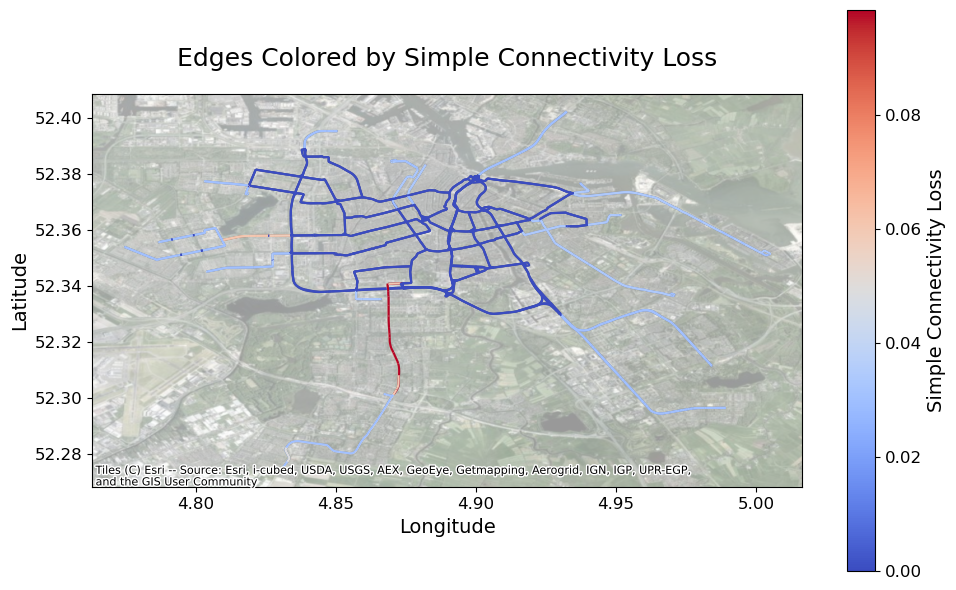

In [127]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Simple Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Simple Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()
plt.savefig('Edges Colored by Simple Connectivity Loss', bbox_inches='tight', dpi=600)
# Display the plot
plt.show()

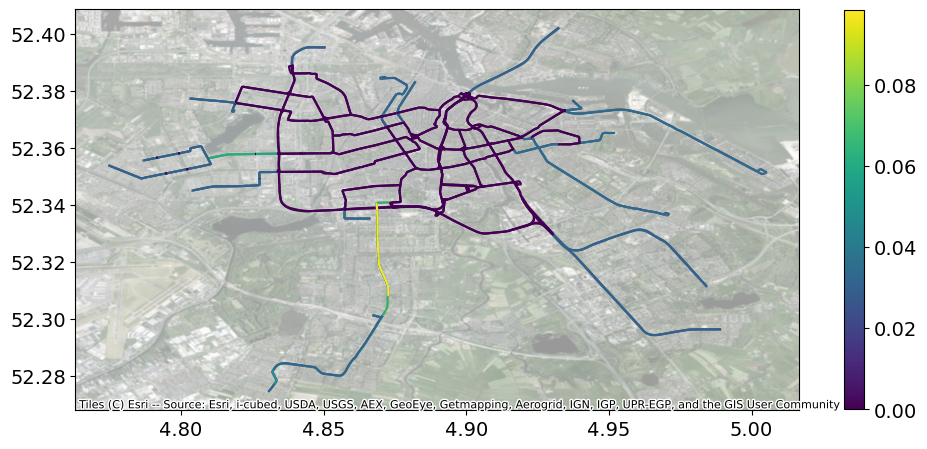

In [136]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl
from matplotlib.colors import PowerNorm

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].min()
vmax = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].max()
# norm = mpl.colors.PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Simple Connectivity Loss', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

In [131]:
scl_df.simple_connectivity_loss.max()

np.float64(0.09835793835793794)

In [153]:
len(city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.simple_connectivity_loss==0])/len(city_two_layer_network_edges_scl_gdf)

0.7134410721324399

In [194]:
scl_df_metro = city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='subway']
scl_df_metro_max_value = scl_df_metro.simple_connectivity_loss.max()

In [195]:
scl_df_metro_max_value

np.float64(0.03030303030303028)

In [203]:
scl_df_metro_0 = len(scl_df_metro[scl_df_metro.simple_connectivity_loss==0])/len(scl_df_metro)
scl_df_metro_02 = len(scl_df_metro[(scl_df_metro.simple_connectivity_loss>0)&(scl_df_metro.simple_connectivity_loss<0.02)])/len(scl_df_metro)
scl_df_metro_04 = len(scl_df_metro[(scl_df_metro.simple_connectivity_loss>0.02)&(scl_df_metro.simple_connectivity_loss<0.04)])/len(scl_df_metro)
scl_df_metro_06 = len(scl_df_metro[(scl_df_metro.simple_connectivity_loss>0.04)&(scl_df_metro.simple_connectivity_loss<0.06)])/len(scl_df_metro)
scl_df_metro_08 = len(scl_df_metro[(scl_df_metro.simple_connectivity_loss>0.06)&(scl_df_metro.simple_connectivity_loss<0.08)])/len(scl_df_metro)
scl_df_metro_max = len(scl_df_metro[scl_df_metro.simple_connectivity_loss==scl_df_metro.simple_connectivity_loss.max()])/len(scl_df_metro)

In [204]:
scl_df_metro_max

0.4339622641509434

In [202]:
scl_df_metro_0

0.5660377358490566

In [224]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = scl_df_metro['simple_connectivity_loss'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(scl_df_metro)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

simple_connectivity_loss
0.000000    56.603774
0.030303    43.396226
Name: count, dtype: float64


In [207]:
scl_df_tram = city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='tram']
scl_df_tram_max_value = scl_df_tram.simple_connectivity_loss.max()

In [208]:
scl_df_tram_max_value

np.float64(0.09835793835793794)

In [223]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = scl_df_tram['simple_connectivity_loss'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(scl_df_tram)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

simple_connectivity_loss
0.000000    69.873079
0.029091     0.066800
0.030303    13.226453
0.032769     0.334001
0.033981    10.688043
0.049179     1.402806
0.058182     0.200401
0.059394     0.066800
0.060606     1.803607
0.063072     0.066800
0.064284     0.133601
0.065537     0.200401
0.066750     0.066800
0.067962     0.400802
0.098358     1.469606
Name: count, dtype: float64


### no_links_scl

In [137]:
no_links_scl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\1_0916\\Dis1_no_links_scl_0916.xlsx',header=0)
no_links_scl_df.columns = ['id','simple_connectivity_loss']
no_links_scl_df = no_links_scl_df.drop_duplicates(subset='id').reset_index(drop=True)
no_links_scl_df

id  simple_connectivity_loss
0     1044                  0.000000
1     2586                  0.000000
2     2584                  0.000000
3     1473                  0.000000
4     2051                  0.000000
...    ...                       ...
2295  3098                  0.121212
2296  3135                  0.121212
2297  3082                  0.121212
2298  1441                  0.121212
2299  2951                  0.121212

[2300 rows x 2 columns]

In [138]:
city_two_layer_network_edges_no_links_scl_df = pd.merge(no_links_scl_df, city_two_layer_network_edges, on='id',how='right')
# city_two_layer_network_edges_no_links_scl_df['geometry'] = city_two_layer_network_edges_no_links_scl_df['geometry'].apply(wkt.loads)
city_two_layer_network_edges_no_links_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_no_links_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_no_links_scl_gdf

id  simple_connectivity_loss      osm_id  \
0      163                  0.030303  39271219.0   
1       16                  0.030303  23207806.0   
2       15                  0.030303  23207802.0   
3      106                  0.030303  26983218.0   
4      114                  0.030303  26983222.0   
...    ...                       ...         ...   
2532  3565                       NaN         NaN   
2533  3566                       NaN         NaN   
2534  3567                       NaN         NaN   
2535  3568                       NaN         NaN   
2536  3569                       NaN         NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway     NaN   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway     NaN   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway     NaN   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway     NaN   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway     NaN   
...                                               ...     ...     ...   
2532    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2533   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2534    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2535  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2536  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2532     2448    138  106.592997  16.500000  (138, 2448)  (2448, 138)   
2533     2449    460  146.981525  16.500000  (460, 2449)  (2449, 460)   
2534     2448    460   98.324093  16.500000  (460, 2448)  (2448, 460)   
2535     1068    840  285.700786  16.500000  (840, 1068)  (1068, 840)   
2536     2300    840  273.373853  16.500000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2532           NaN                            NaN     NaN     NaN   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2532  6875.000000  6875.000000  
2533  6875.000000  6875.000000  
2534  6875.000000  6875.000000  
2535  6875.000000  6875.000000  
2536  6875.000000  6875.000000  

[2537 rows x 18 columns]

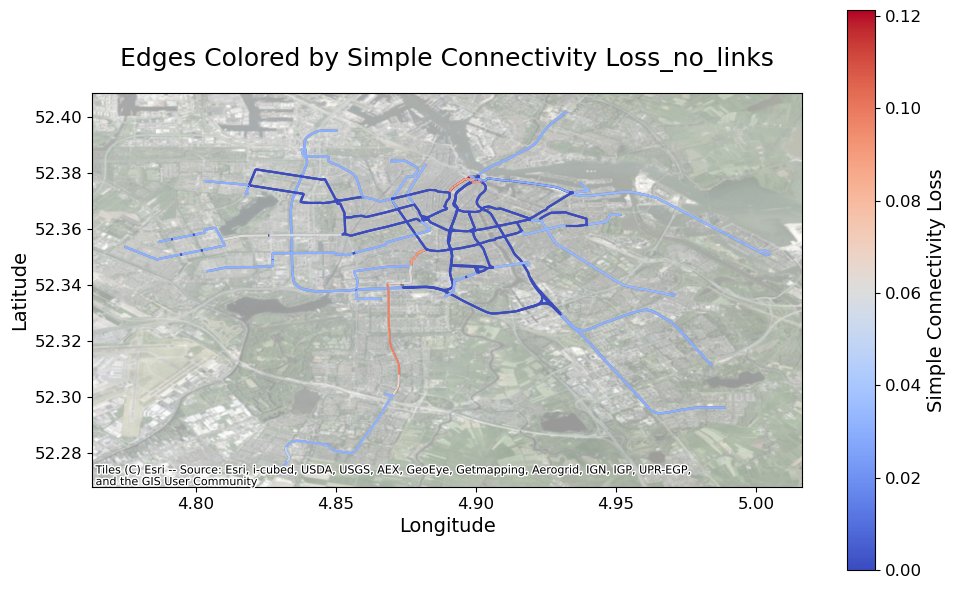

In [130]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_no_links_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Simple Connectivity Loss_no_links', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Simple Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()
plt.savefig('Edges Colored by Simple Connectivity Loss_no_links', bbox_inches='tight', dpi=600)
# Display the plot
plt.show()

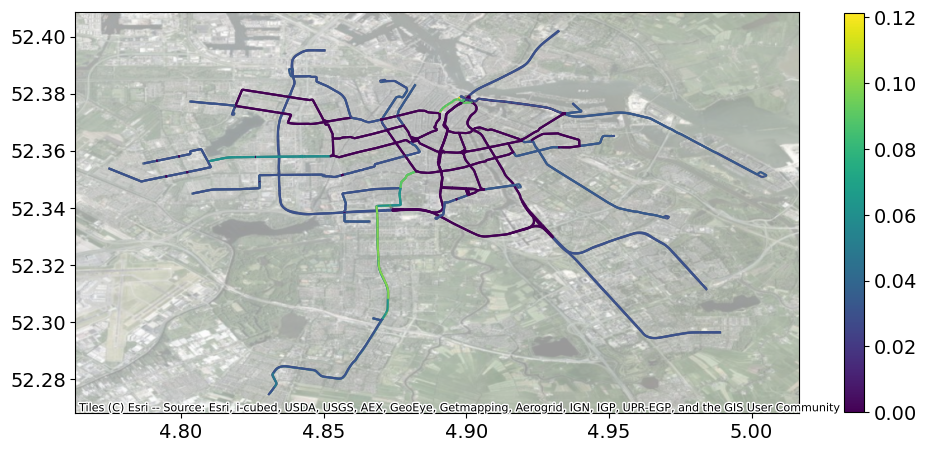

In [139]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_no_links_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_no_links_scl_gdf['simple_connectivity_loss'].min()
vmax = city_two_layer_network_edges_no_links_scl_gdf['simple_connectivity_loss'].max() 
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Simple Connectivity Loss_no_links', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

In [205]:
no_links_scl_df.simple_connectivity_loss.max()

np.float64(0.1212121212121212)

In [206]:
len(city_two_layer_network_edges_no_links_scl_gdf[city_two_layer_network_edges_no_links_scl_gdf.simple_connectivity_loss==0])/len(city_two_layer_network_edges_no_links_scl_gdf)

0.4572329523058731

In [225]:
no_links_scl_df_metro = city_two_layer_network_edges_no_links_scl_gdf[city_two_layer_network_edges_no_links_scl_gdf.railway=='subway']
no_links_scl_df_metro_max_value = scl_df_metro.simple_connectivity_loss.max()

In [226]:
no_links_scl_df_metro_max_value

np.float64(0.03030303030303028)

In [227]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = no_links_scl_df_metro['simple_connectivity_loss'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(no_links_scl_df_metro)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

simple_connectivity_loss
0.000000    37.735849
0.030303    62.264151
Name: count, dtype: float64


In [228]:
no_links_scl_df_tram = city_two_layer_network_edges_no_links_scl_gdf[city_two_layer_network_edges_no_links_scl_gdf.railway=='tram']
no_links_scl_df_tram_max_value = scl_df_tram.simple_connectivity_loss.max()

In [229]:
no_links_scl_df_tram_max_value

np.float64(0.09835793835793794)

In [230]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = no_links_scl_df_tram['simple_connectivity_loss'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(no_links_scl_df_tram)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

simple_connectivity_loss
0.000000    49.699399
0.021725     0.601202
0.029091     0.066800
0.030303    20.574482
0.032769     0.334001
0.033981     2.471610
0.033981    14.161657
0.043450     0.133601
0.049179     1.402806
0.058182     1.068804
0.058275     0.467602
0.059394     0.066800
0.060606     1.937208
0.063072     0.066800
0.064284     0.133601
0.065175     0.133601
0.065537     1.135605
0.066750     0.066800
0.067962     0.400802
0.068055     0.534402
0.086900     1.068804
0.088578     0.467602
0.090909     0.467602
0.098358     1.469606
0.102036     0.534402
0.121212     0.534402
Name: count, dtype: float64


### wcl

In [140]:
wcl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\1_0916\\Dis1_dwcl_0916.xlsx',header=0)
wcl_df = wcl_df[['removed_edge_id',	'DWCL_weights']]
wcl_df.columns = ['id','DWCL_weights']
wcl_df = wcl_df.drop_duplicates(subset='id').reset_index(drop=True)
wcl_df

id  DWCL_weights
0      163      0.004898
1       16      0.004898
2       15      0.004898
3      106      0.004898
4      114      0.004898
...    ...           ...
2523  3565      0.000077
2524  3566      0.000000
2525  3567      0.000000
2526  3568      0.000000
2527  3569      0.000000

[2528 rows x 2 columns]

In [141]:
city_two_layer_network_edges_wcl_df = pd.merge(wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_wcl_df.copy(), geometry='geometry')
city_two_layer_network_edges_wcl_gdf

id  DWCL_weights      osm_id  \
0      163      0.004898  39271219.0   
1       16      0.004898  23207806.0   
2       15      0.004898  23207802.0   
3      106      0.004898  26983218.0   
4      114      0.004898  26983222.0   
...    ...           ...         ...   
2532  3565      0.000077         NaN   
2533  3566      0.000000         NaN   
2534  3567      0.000000         NaN   
2535  3568      0.000000         NaN   
2536  3569      0.000000         NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway     NaN   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway     NaN   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway     NaN   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway     NaN   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway     NaN   
...                                               ...     ...     ...   
2532    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2533   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2534    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2535  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2536  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2532     2448    138  106.592997  16.500000  (138, 2448)  (2448, 138)   
2533     2449    460  146.981525  16.500000  (460, 2449)  (2449, 460)   
2534     2448    460   98.324093  16.500000  (460, 2448)  (2448, 460)   
2535     1068    840  285.700786  16.500000  (840, 1068)  (1068, 840)   
2536     2300    840  273.373853  16.500000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2532           NaN                            NaN     NaN     NaN   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2532  6875.000000  6875.000000  
2533  6875.000000  6875.000000  
2534  6875.000000  6875.000000  
2535  6875.000000  6875.000000  
2536  6875.000000  6875.000000  

[2537 rows x 18 columns]

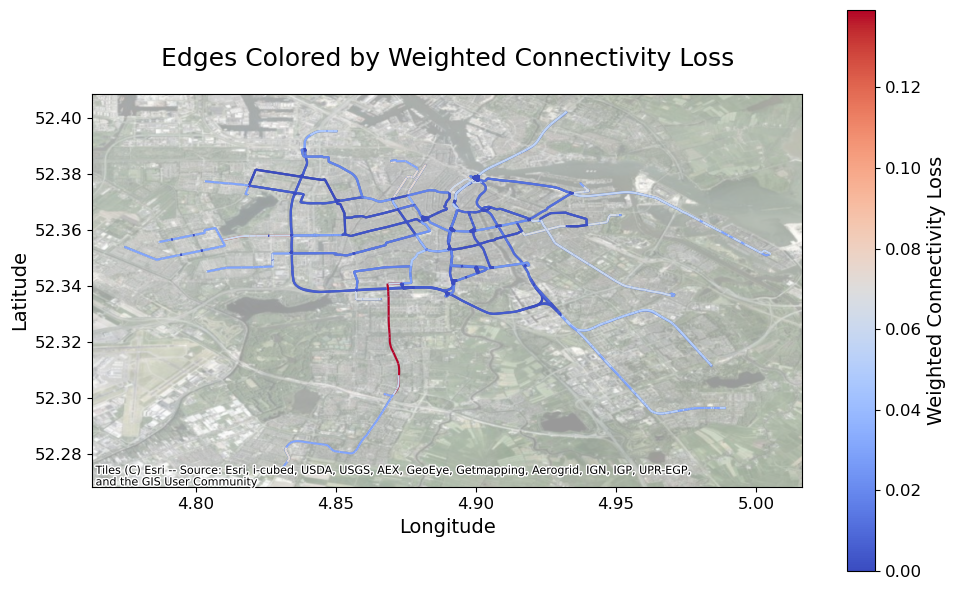

In [133]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Weighted Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Weighted Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()
plt.savefig('Edges Colored by Weighted Connectivity Loss', bbox_inches='tight', dpi=600)
# Display the plot
plt.show()

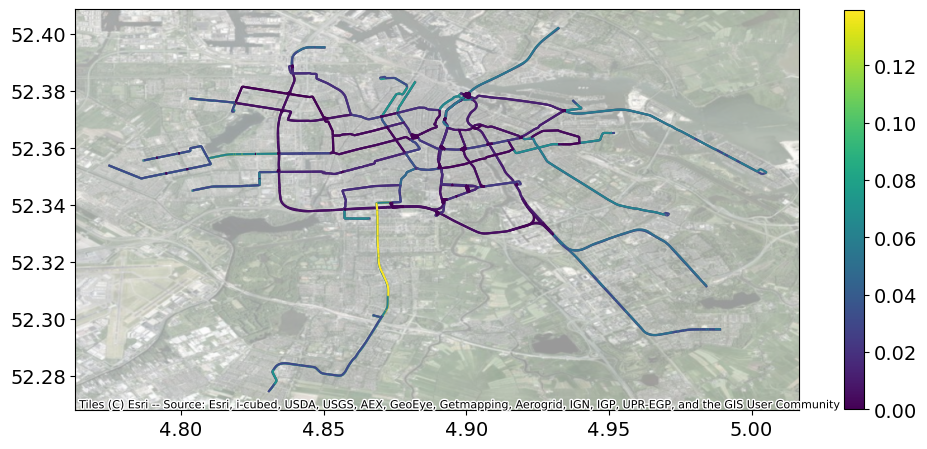

In [142]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].min()
# vmax = 0.18 
vmax = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Weighted Connectivity Loss', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

In [232]:
wcl_df.DWCL_weights.max()

np.float64(0.1392304569167617)

In [234]:
wcl_df_metro = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway=='subway']
wcl_df_metro_max_value = wcl_df_metro.DWCL_weights.max()

In [235]:
wcl_df_metro_max_value

np.float64(0.05585697931672384)

In [236]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = wcl_df_metro['DWCL_weights'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(wcl_df_metro)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

DWCL_weights
0.000489     2.044025
0.000732     2.515723
0.002862     0.628931
0.003465     0.943396
0.003519     0.943396
0.003522     0.471698
0.003867     1.257862
0.004898     9.276730
0.004957     3.301887
0.005012     2.830189
0.005176     2.830189
0.006123     9.591195
0.006381     0.471698
0.007210     2.358491
0.007230     0.786164
0.007269     1.415094
0.007285     0.786164
0.007293     0.943396
0.007307     0.943396
0.007378     0.943396
0.007708     1.572327
0.007785     1.572327
0.008232     0.157233
0.008878     0.471698
0.009392     0.157233
0.009487     0.786164
0.009736     0.314465
0.009779     0.786164
0.010032     1.257862
0.010667     0.786164
0.013108     0.786164
0.013446     0.471698
0.013734     0.157233
0.013954     1.257862
0.015008     0.786164
0.030303    21.383648
0.048331     1.415094
0.050226     7.547170
0.052124    11.006289
0.055857     2.044025
Name: count, dtype: float64


In [241]:
len(wcl_df_metro[wcl_df_metro.DWCL_weights < 0.01])/len(wcl_df_metro)

0.5110062893081762

In [242]:
len(wcl_df_metro[wcl_df_metro.DWCL_weights > 0.01])/len(wcl_df_metro)

0.4889937106918239

In [238]:
wcl_df_tram = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway=='tram']
wcl_df_tram_max_value = wcl_df_tram.DWCL_weights.max()

In [239]:
wcl_df_tram_max_value

np.float64(0.1392304569167617)

In [240]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = wcl_df_tram['DWCL_weights'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(wcl_df_tram)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

DWCL_weights
0.000000    3.273213
0.000176    0.066800
0.000560    0.267201
0.000576    0.200401
0.001019    1.469606
              ...   
0.104229    0.133601
0.110453    0.200401
0.115042    0.400802
0.128734    0.066800
0.139230    1.469606
Name: count, Length: 221, dtype: float64


In [243]:
len(wcl_df_tram[wcl_df_tram.DWCL_weights < 0.01])/len(wcl_df_metro)

0.7437106918238994

In [245]:
len(wcl_df_tram[wcl_df_tram.DWCL_weights > 0.1])/len(wcl_df_metro)

0.05345911949685535

### no_links_wcl

In [143]:
no_links_wcl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\1_0916\\Dis1_no_links_dwcl_0916.xlsx',header=0)
no_links_wcl_df = no_links_wcl_df[['removed_edge_id',	'DWCL_weights']]
no_links_wcl_df.columns = ['id','DWCL_weights']
no_links_wcl_df = no_links_wcl_df.drop_duplicates(subset='id').reset_index(drop=True)
no_links_wcl_df

id  DWCL_weights
0      163       0.04824
1       16       0.04824
2       15       0.04824
3      106       0.04824
4      114       0.04824
...    ...           ...
2295  3337       0.00000
2296  3338       0.00000
2297  3339       0.00000
2298  3340       0.00000
2299  3341       0.00000

[2300 rows x 2 columns]

In [144]:
city_two_layer_network_edges_no_links_wcl_df = pd.merge(no_links_wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_no_links_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_no_links_wcl_df.copy(), geometry='geometry')
city_two_layer_network_edges_no_links_wcl_gdf

id  DWCL_weights      osm_id  \
0      163       0.04824  39271219.0   
1       16       0.04824  23207806.0   
2       15       0.04824  23207802.0   
3      106       0.04824  26983218.0   
4      114       0.04824  26983222.0   
...    ...           ...         ...   
2532  3565           NaN         NaN   
2533  3566           NaN         NaN   
2534  3567           NaN         NaN   
2535  3568           NaN         NaN   
2536  3569           NaN         NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway     NaN   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway     NaN   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway     NaN   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway     NaN   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway     NaN   
...                                               ...     ...     ...   
2532    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2533   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2534    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2535  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2536  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2532     2448    138  106.592997  16.500000  (138, 2448)  (2448, 138)   
2533     2449    460  146.981525  16.500000  (460, 2449)  (2449, 460)   
2534     2448    460   98.324093  16.500000  (460, 2448)  (2448, 460)   
2535     1068    840  285.700786  16.500000  (840, 1068)  (1068, 840)   
2536     2300    840  273.373853  16.500000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2532           NaN                            NaN     NaN     NaN   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2532  6875.000000  6875.000000  
2533  6875.000000  6875.000000  
2534  6875.000000  6875.000000  
2535  6875.000000  6875.000000  
2536  6875.000000  6875.000000  

[2537 rows x 18 columns]

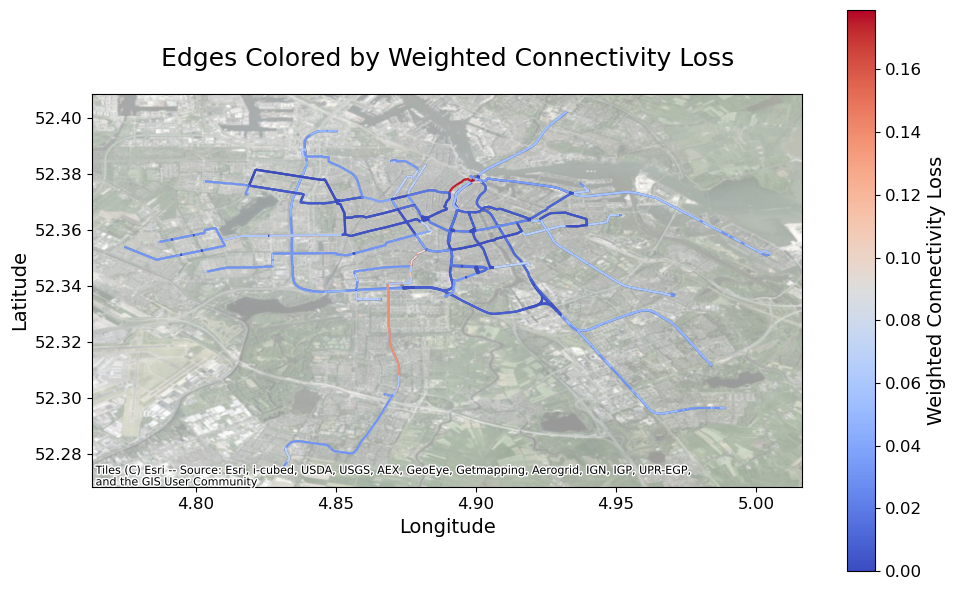

In [155]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_no_links_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Weighted Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Weighted Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()
plt.savefig('Edges Colored by Weighted Connectivity Loss_no_links', bbox_inches='tight', dpi=600)
# Display the plot
plt.show()

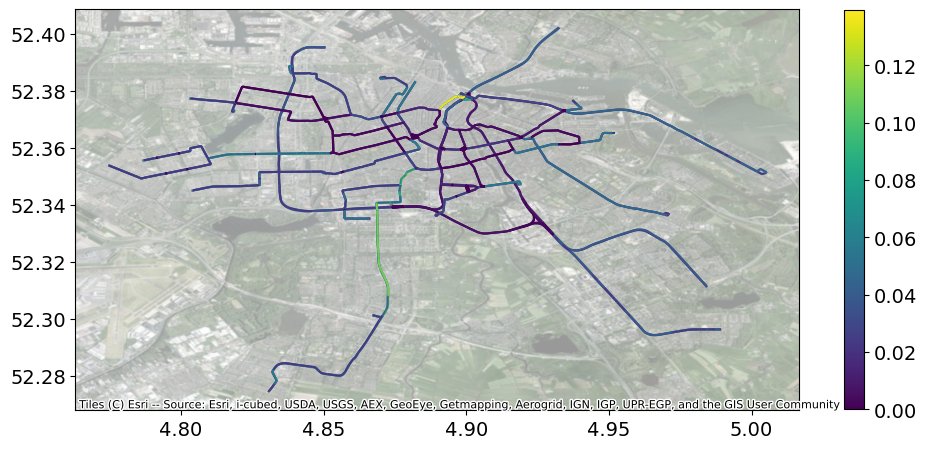

In [145]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_no_links_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_no_links_wcl_gdf['DWCL_weights'].min()
# vmax = 0.18 
vmax = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Weighted Connectivity Loss_no_links', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

In [247]:
no_links_wcl_df.DWCL_weights.max()

np.float64(0.1789481686486625)

In [248]:
no_links_wcl_df_metro = city_two_layer_network_edges_no_links_wcl_gdf[city_two_layer_network_edges_no_links_wcl_gdf.railway=='subway']
no_links_wcl_df_metro_max_value = no_links_wcl_df_metro.DWCL_weights.max()

In [249]:
no_links_wcl_df_metro_max_value

np.float64(0.05570123712555208)

In [250]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = no_links_wcl_df_metro['DWCL_weights'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(no_links_wcl_df_metro)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

DWCL_weights
0.001094     0.471698
0.001230     1.572327
0.001819     0.471698
0.002054     2.044025
0.002865     0.628931
0.003480     0.943396
0.003522     0.471698
0.003523     0.943396
0.003867     1.257862
0.005012     2.830189
0.006388     0.471698
0.007366     3.301887
0.008239     5.660377
0.008258     0.157233
0.008295     5.660377
0.008651     2.830189
0.008878     0.471698
0.009392     0.157233
0.009788     0.786164
0.011760     3.144654
0.013734     0.157233
0.016915     3.301887
0.030303    30.974843
0.048240    10.691824
0.050269     7.547170
0.052176    11.006289
0.055701     2.044025
Name: count, dtype: float64


In [251]:
len(no_links_wcl_df_metro[no_links_wcl_df_metro.DWCL_weights < 0.01])/len(no_links_wcl_df_metro)

0.3113207547169811

In [252]:
len(no_links_wcl_df_metro[no_links_wcl_df_metro.DWCL_weights > 0.01])/len(no_links_wcl_df_metro)

0.6886792452830188

In [253]:
no_links_wcl_df_tram = city_two_layer_network_edges_no_links_wcl_gdf[city_two_layer_network_edges_no_links_wcl_gdf.railway=='tram']
no_links_wcl_df_tram_max_value = no_links_wcl_df_tram.DWCL_weights.max()

In [254]:
no_links_wcl_df_tram_max_value

np.float64(0.1789481686486625)

In [255]:
# 按simple_connectivity_loss列的值分组并统计每个值的频率
value_counts = no_links_wcl_df_tram['DWCL_weights'].value_counts()

# 计算每个值在整个DataFrame中所占的比例，乘以100转换为百分比
proportions_percentage = (value_counts / len(no_links_wcl_df_tram)) * 100

# 将index转换为数值类型，确保按simple_connectivity_loss的值从小到大排序
proportions_percentage.index = proportions_percentage.index.astype(float)

# 按simple_connectivity_loss的值从小到大排序
proportions_percentage_sorted = proportions_percentage.sort_index()

# 打印出排序后的结果
print(proportions_percentage_sorted)

DWCL_weights
0.000000    3.273213
0.000176    0.066800
0.000560    0.267201
0.000576    0.200401
0.001019    1.469606
              ...   
0.138875    0.066800
0.139241    1.469606
0.170372    0.534402
0.174992    0.801603
0.178948    0.267201
Name: count, Length: 197, dtype: float64


In [256]:
len(no_links_wcl_df_tram[no_links_wcl_df_tram.DWCL_weights < 0.01])/len(no_links_wcl_df_metro)

0.7437106918238994

In [257]:
len(no_links_wcl_df_tram[no_links_wcl_df_tram.DWCL_weights > 0.1])/len(no_links_wcl_df_metro)

0.14622641509433962